# Testing new AMM


In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model import processing
#from model.plot_utils import *
from model import plot_utils as pu
from model.amm.amm import Asset, WorldState
from model.amm.omnipool_amm import OmnipoolAgent, OmniPool, OmnipoolTradeStrategies

assets = [
    Asset(name='LRNA', price=0.4),
    Asset(name='HDX', price=0.1),
    Asset(name='USD', price=1),
    Asset(name='R1', price=2),
    Asset(name='R2', price=2/3)
]
omnipool = (
    OmniPool(
        tvl_cap_usd=10000000,
        lrna_fee=0.0015,
        asset_fee=0.0015,
        preferred_stablecoin='USD'
    )
    .add_lrna_pool('HDX', 1000000)
    .add_lrna_pool('USD', 100000)
    .add_lrna_pool('R1', 1)
    .add_lrna_pool('R2', 1)
)
agents = {
    "Trader": OmnipoolAgent(
        name='trader',
        trade_strategy=OmnipoolTradeStrategies.random_swaps(amount = 1000)
    )
    .add_position('R1', 1000000)
    .add_position('LRNA', 1000000),
    
    'LP1': OmnipoolAgent(
        name='Liquidity Provider 1'
    )
    .add_liquidity(omnipool, 'R1', 500000),

    'LP2': OmnipoolAgent(
        name='Liquidity Provider 2'
    )
    .add_liquidity(omnipool, 'R1', 1500000),
}

worldState = WorldState(
    exchange=omnipool,
    agents=agents
)

timesteps = 5000
state = {'WorldState': worldState}
config_dict = {
    'N': 1,  # number of monte carlo runs
    'T': range(timesteps),  # number of timesteps - 147439 is the length of uniswap_events
    'M': {'timesteps': [timesteps]},  # simulation parameters
}

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (5000, 1, 1, 1)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 4.47s


In [2]:
rdf, agent_df = processing.postprocessing(events, params_to_include=['withdraw_val', 'hold_val', 'pool_val'])


In [3]:
%matplotlib inline



In [4]:
rdf.head(20)

,timestep,L,simulation,substep,subset,run,R-HDX,R-USD,R-R1,R-R2,...,B-R2,S-HDX,S-USD,S-R1,S-R2,P-HDX,P-USD,P-R1,P-R2,pool_val
1,1,0.00,0,1,0,1,1000000,100000,2000001.00,1,...,1,1000000,100000,2000001.00,1,0.25,2.50,5.00,1.67,4.42
2,2,0.00,0,1,0,1,1000000,100000,2000001.00,1,...,1,1000000,100000,2000001.00,1,0.25,2.50,5.00,1.67,4.42
3,3,0.00,0,1,0,1,1000000,100000,2000001.00,1,...,1,1000000,100000,2000001.00,1,0.25,2.50,5.00,1.67,4.42
4,4,0.00,0,1,0,1,1000000,100000,2000001.00,1,...,1,1000000,100000,2000001.00,1,0.25,2.50,5.00,1.67,4.42
5,5,-4988.13,0,1,0,1,1000000,100000,2000500.25,1,...,1,1000000,100000,2000001.00,1,0.25,2.50,5.00,1.67,4.42
6,6,-9973.78,0,1,0,1,1000000,100000,2000999.50,1,...,1,1000000,100000,2000001.00,1,0.25,2.50,5.00,1.67,4.42
7,7,-9973.78,0,1,0,1,1000000,100000,2000999.50,1,...,1,1000000,100000,2000001.00,1,0.25,2.50,5.00,1.67,4.42
8,8,-9973.78,0,1,0,1,1000000,100000,2000999.50,1,...,1,1000000,100000,2000001.00,1,0.25,2.50,5.00,1.67,4.42
9,9,-14956.93,0,1,0,1,1000000,100000,2001498.75,1,...,1,1000000,100000,2000001.00,1,0.25,2.50,4.99,1.67,4.42
10,10,-9961.31,0,1,0,1,1000000,100000,2000998.88,1,...,1,1000000,100000,2000001.00,1,0.25,2.50,5.00,1.67,4.42


In [5]:
agent_df.tail(20)

,simulation,subset,run,substep,timestep,q,agent_label,r-HDX,r-USD,r-R1,r-R2,s-HDX,s-USD,s-R1,s-R2,withdraw_val,hold_val
14983,0,0,1,1,4994,0.00,LP1,0,0,0.00,0,0,0,500000.00,0,2485137.80,2484564.62
14984,0,0,1,1,4994,0.00,LP2,0,0,0.00,0,0,0,1500000.00,0,7455413.40,7453693.86
14985,0,0,1,1,4995,1028570.93,Trader,0,0,992375.91,0,0,0,0.00,0,0.00,0.00
14986,0,0,1,1,4995,0.00,LP1,0,0,0.00,0,0,0,500000.00,0,2485137.80,2484564.62
14987,0,0,1,1,4995,0.00,LP2,0,0,0.00,0,0,0,1500000.00,0,7455413.40,7453693.86
14988,0,0,1,1,4996,1026070.93,Trader,0,0,992878.14,0,0,0,0.00,0,0.00,0.00
14989,0,0,1,1,4996,0.00,LP1,0,0,0.00,0,0,0,500000.00,0,2486385.47,2485809.68
14990,0,0,1,1,4996,0.00,LP2,0,0,0.00,0,0,0,1500000.00,0,7459156.40,7457429.04
14991,0,0,1,1,4997,1023570.93,Trader,0,0,993380.11,0,0,0,0.00,0,0.00,0.00
14992,0,0,1,1,4997,0.00,LP1,0,0,0.00,0,0,0,500000.00,0,2487633.29,2487055.06


## Analysis

[0]


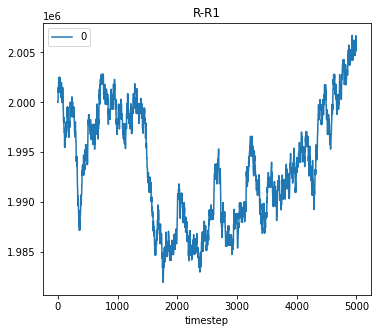

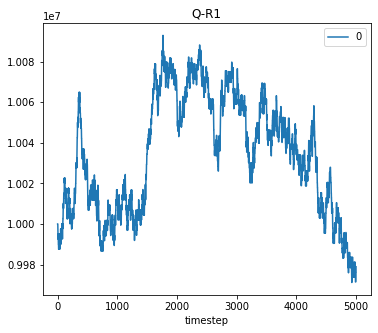

In [12]:
var_list = ['R-R1', 'Q-R1']
pu.plot_vars(rdf, var_list)


[0]


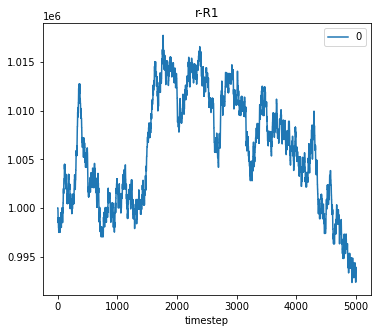

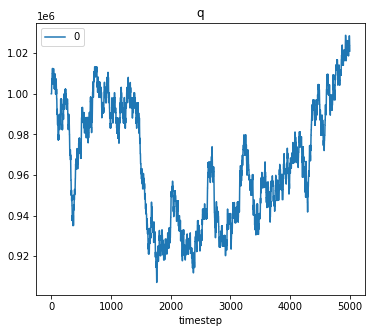

In [13]:
var_list = ['r-R1', 'q']
trader_df = agent_df[agent_df['agent_label'] == 'Trader']
pu.plot_vars(trader_df, var_list)


In [14]:
# merge agent_df, rdf to one df on timesteps, run, etc

merged_df = pd.merge(agent_df, rdf, how="inner", on=["timestep", "simulation", "run", "subset", "substep"])

In [15]:
# add IL column to agent DF, where val_hold is calculated using initial holdings from agent_d
#val hold: withdraw liquidity at t=0, calculate value with prices at t
#val pool: withdraw liquidity at t, calculate value with prices at t


merged_df['IL'] = merged_df.apply(lambda x: x['withdraw_val']/x['hold_val'] - 1 if x['hold_val'] else 0, axis=1)
merged_df['pool_loss'] = merged_df.apply(lambda x: x['pool_val']/2000000 - 1, axis=1)

merged_df[['timestep', 'agent_label', 'q','Q-R1','B-R1','s-R1','S-R1','r-R1','R-R1','withdraw_val', 'hold_val','IL','pool_val']].tail()


# compute val hold column


# compute val pool column

# compute IL

# plot Impermanent loss
# 

,timestep,agent_label,q,Q-R1,B-R1,s-R1,S-R1,r-R1,R-R1,withdraw_val,hold_val,IL,pool_val
14995,4999,LP1,0.00,9976434.07,1,500000.00,2000001.00,0.00,2005672.14,2487633.29,2487055.06,0.00,4.42
14996,4999,LP2,0.00,9976434.07,1,1500000.00,2000001.00,0.00,2005672.14,7462899.88,7461165.17,0.00,4.42
14997,5000,Trader,1021070.93,9978934.07,1,0.00,2000001.00,993881.83,2005170.42,0.00,0.00,0.00,4.42
14998,5000,LP1,0.00,9978934.07,1,500000.00,2000001.00,0.00,2005170.42,2488881.28,2488300.74,0.00,4.42
14999,5000,LP2,0.00,9978934.07,1,1500000.00,2000001.00,0.00,2005170.42,7466643.83,7464902.22,0.00,4.42


In [16]:
merged_df[['timestep', 'agent_label', 'q','Q-R1','B-R1','s-R1','S-R1','r-R1','R-R1','withdraw_val', 'hold_val','IL','pool_val']].head()


,timestep,agent_label,q,Q-R1,B-R1,s-R1,S-R1,r-R1,R-R1,withdraw_val,hold_val,IL,pool_val
0,1,Trader,1000000.00,10000005.00,1,0.00,2000001.00,1000000.00,2000001.00,0.00,0.00,0.00,4.42
1,1,LP1,0.00,10000005.00,1,500000.00,2000001.00,0.00,2000001.00,2500000.00,2500000.00,0.00,4.42
2,1,LP2,0.00,10000005.00,1,1500000.00,2000001.00,0.00,2000001.00,7500000.00,7500000.00,0.00,4.42
3,2,Trader,1000000.00,10000005.00,1,0.00,2000001.00,1000000.00,2000001.00,0.00,0.00,0.00,4.42
4,2,LP1,0.00,10000005.00,1,500000.00,2000001.00,0.00,2000001.00,2500000.00,2500000.00,0.00,4.42


## Conclusion



[0]


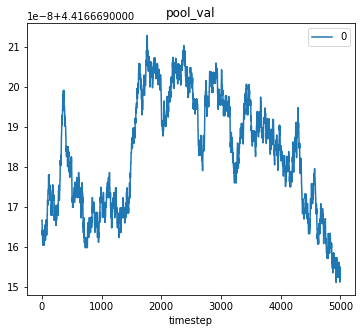

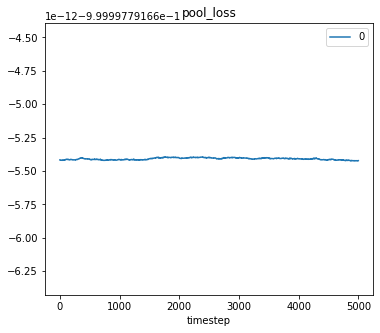

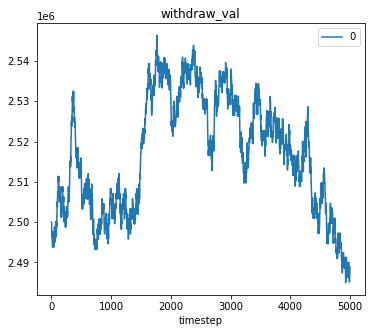

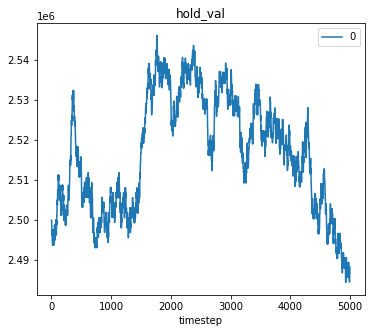

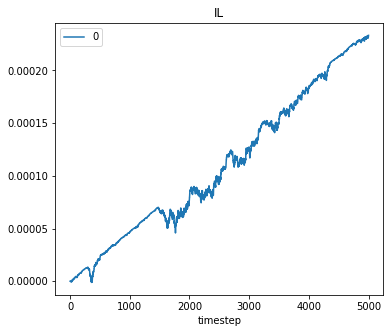

In [11]:
var_list = ['pool_val', 'pool_loss', 'withdraw_val', 'hold_val', 'IL']
LP1_merged_df = merged_df[merged_df['agent_label'] == 'LP1']
pu.plot_vars(LP1_merged_df, var_list)